# Updating Data Frames
## Adding a single column...
In this lesson we will introduce methods for updating a pandas.DataFrame, these include adding and removing columns and updating specific values.

## About the data
For this section we will use the Palmer Penguins dataset [1] developed by Drs. Allison Horst, Alison Hill and Kristen Gorman. This dataset contains size measurements for three penguin species in the Palmer Archipelago, Antarctica during 2007, 2008, and 2009.

The dataset has 344 rows and 8 columns. We can see the head of the dataset below:

Let us start by importing the packages we will use in this lesson and loading the data:



In [1]:
import numpy as np
import pandas as pd
import random  # Used for randomly sampling integers

# Set the seed
random.seed(42)

# Import data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

## using dictionary-like syntax
The simplest syntax to add a new column to a pandas.DataFrame is

`df['new_col_name'] = new_column_values`

where the new_column_values could be:

- a pandas.Series or a numpy.array of the same length as the data frame, or
- a single scalar.

If the column name exists, the existing column will be updated.

Remember a pandas.DataFrame can be seen as a dictionary of its columns. This syntax for adding a new column to a pandas.DataFrame is the same as adding a new key-value pair to a dictionary:

### Add a new key-value pair to a dictionary

`dict[new_key] = new_value`

Example
We want to create a new column where the body mass is in kilograms instead of grams, then we need to divide each value in the body_mass_g by 1000.

In [2]:
# Add new column body_mass_kg 
penguins['body_mass_kg'] = penguins['body_mass_g']/1000

# Confirm the new column is in the data frame
print("body_mass_kg is in the data frame's columns: ", 'body_mass_kg' in penguins.columns)

# This will be required later on in class
print('body_mass_kg' in penguins.columns)

# Look at the new column
penguins.head()

body_mass_kg is in the data frame's columns:  True
True


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## …using the `assign()` method
We can also create or update an existing column using the assign() method for pandas.DataFrames. The general syntax is:

`df = df.assign(new_col_name=new_column_values)`

Notice the new column names are not strings, we declare them as if we were creating variables.

This way of creating a new column, unlike the dictionary-like syntax, does not modify the data frame in-place. This can be useful for chaining operations:

<Axes: xlabel='bill_length_cm', ylabel='body_mass_g'>

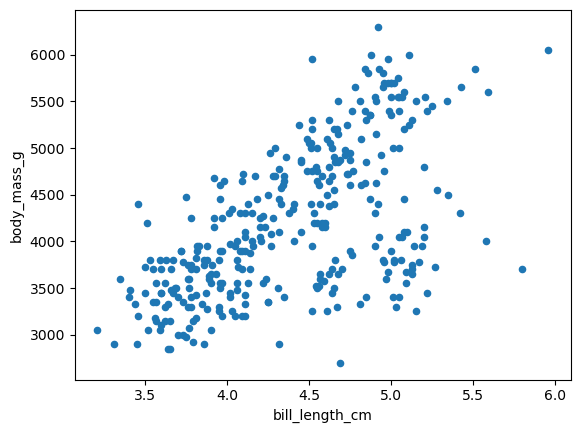

In [3]:
(penguins.assign(bill_length_cm=penguins.bill_length_mm/10)
        .plot(kind='scatter',
              x='bill_length_cm', 
              y='body_mass_g')
    )

## …at a specific location
The new column was added by default at the end of the data frame. If we want to create a new column and insert it at a particular position we can use the data frame method insert():
```
df.insert(loc=integer_index,  # Location of new column
          column='new_col_name', 
          value=new_col_values)
```          
          
**Example**
Let’s give each penguin observation a unique identifier as a three digit number and add this column at the beginning of the data frame.

In [4]:
# Create random 3-digit codes
codes = random.sample(range(100,1000), len(penguins))  # Sampling w/o replacement

# Insert codes at the front of data frame
penguins.insert(loc=0,  # Index, location of where it should be inserted
                column='id_code', #creating a new column 
                value=codes) # Adding 'codes' values
        
penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45


## Adding multiple columns
We can also use the `assign()` method to create or update multiple columns in the same call. The general syntax is:

```
df = df.assign(new_col1_name=new_col1_values, 
               new_col2_name=new_col2_values)
```

Remember this method does not modify the data frame, so you will need to reassign the output to the original data frame to update it.

Example
Suppose we want to add these new columns:

- flipper length converted from mm to cm, and
- a code representing the observer.
We can add these columns to `penguins` using `assign()`:


In [5]:
# Create columns with observer codes and flipper length in cm
penguins = penguins.assign(flipper_length_cm=penguins.flipper_length_mm/10, 
                           observer=random.choices(['A','B','C'],  # Sample with replacement
                                                    k=len(penguins))
                          )
# Examine result
penguins.head()

,id_code,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,body_mass_kg,flipper_length_cm,observer
0,754,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,3.75,18.1,C
1,214,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,3.80,18.6,A
2,125,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,3.25,19.5,C
3,859,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN,NaN,A
4,381,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,3.45,19.3,B


## Removing columns
We can remove columns using the **drop()** method for pandas.Data.Frames, the syntax is:

````
df = df.drop(columns=col_names)
````

where col_names can be a single column name (string) or a list of column names. Notice again that the drop() method does not modify the data frame in place, so you need to reassign the output.

Example
Now that we updated the units for flipper length and body mass, it makes sense to remove the previous columns to avoid duplicate information. We can do this using drop():

In [6]:
# Remove duplicate length and mass measurements
penguins = penguins.drop(columns=['flipper_length_mm','body_mass_g'])

# Confirm result
print(penguins.columns)

Index(['id_code', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'sex', 'year', 'body_mass_kg', 'flipper_length_cm', 'observer'],
      dtype='object')


## Updating values
Sometimes we want to update a specific value in our data frame. We’ll review some methods and best practices to do that in this section.

### A single value
We can access a single value in a pandas.DataFrame using the locators

- `at[]` to select by labels, or
- `iat[]` to select by position.

The syntax for `at[]` is:
```
df.at[single_index_value, 'column_name']
```

**Think of `at[]` as the equivalent to `loc[]` when trying to access a single value.**

### Example: 

For this example, let’s first update the index of the data frame to be the id_code column:

`penguins.set_index('id_code')`

- this does not reassign the dataframe- ** It needs to be assigned, `inplace =TRUE`, or remove in order to change the dataframe. This just prints out what code we ran



In [7]:
penguins = penguins.set_index('id_code')
penguins

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer
id_code,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.750,18.1,C
214,Adelie,Torgersen,39.5,17.4,female,2007,3.800,18.6,A
125,Adelie,Torgersen,40.3,18.0,female,2007,3.250,19.5,C
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A
381,Adelie,Torgersen,36.7,19.3,female,2007,3.450,19.3,B
...,...,...,...,...,...,...,...,...,...
140,Chinstrap,Dream,55.8,19.8,male,2009,4.000,20.7,C
183,Chinstrap,Dream,43.5,18.1,female,2009,3.400,20.2,A
969,Chinstrap,Dream,49.6,18.2,male,2009,3.775,19.3,C


If we want to know what was the bill length of the penguin which has ID number 859, we can directly access that information using `at[]`:

In [8]:
# Check bill length of penguin with ID 859
penguins.at[859, 'bill_length_mm']
#print(penguins.at[754, 'bill_length_mm'])

nan

We get this bill length is an NA. Maybe we want to update it to 38.3 mm. We can do this with at[] too:



In [9]:
# Correct bill length value of penguin with ID 859
penguins.at[859,'bill_length_mm'] = 38.3 # updating with new value

# Confirm value was updated
penguins.loc[859]

species                 Adelie
island               Torgersen
bill_length_mm            38.3
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     A
Name: 859, dtype: object

If we want to access or update a single value by index position we just `iat[]` locator:

Syntax:
```
df.iat[ index_integer_location , column_integer_location]
```

## Dynamically get the location of a single column
```
df.columns.get_loc('column_name')
```
## Check-In
a. Obtain the location of the `bill_length_mm` column programtically

2. use `iat[]` to access the bill length for the penguin with ID #___ and revert it back to NA. Confirm the changes in your favorite way.

In [13]:
#1
# penguin.columns - Gets name of columns

bill_length_index = penguins.columns.get_loc('bill_length_mm')

In [14]:
bill_length_index

2

In [15]:
# 2
penguins.iat[3, bill_length_index] = np.nan
penguins.iloc[3]

species                 Adelie
island               Torgersen
bill_length_mm             NaN
bill_depth_mm              NaN
sex                        NaN
year                      2007
body_mass_kg               NaN
flipper_length_cm          NaN
observer                     A
Name: 859, dtype: object

# Multiple values in a column

### Using a condition

Example:

We want to classify the Palmer penguins such that:
- penguins with body mass < 3kg are small
- penguins with 3kg <= body mass <5 kg are medium
- penguins wiht 5kg < body mass are large

In [16]:
# Create a list with the condition
conditions = [penguins.body_mass_kg < 3,
              (3 <= penguins.body_mass_kg) & (penguins.body_mass_kg < 5),
              5 <= penguins.body_mass_kg
             ]

# Create a list with the choices
choices = [ 'small',
           'medium',
           'large' ] 

# Add the selections using np.select
penguins['size'] = np.select(conditions,
                             choices, default = np.nan) # Value for anything outside conditions

# Display updated dataframe
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size
id_code,,,,,,,,,,
754,Adelie,Torgersen,39.1,18.7,male,2007,3.75,18.1,C,medium
214,Adelie,Torgersen,39.5,17.4,female,2007,3.80,18.6,A,medium
125,Adelie,Torgersen,40.3,18.0,female,2007,3.25,19.5,C,medium
859,Adelie,Torgersen,NaN,NaN,NaN,2007,NaN,NaN,A,nan
381,Adelie,Torgersen,36.7,19.3,female,2007,3.45,19.3,B,medium


## Update values by selecting them

We can do this with `loc` or `iloc` and assigning new values

Syntax:

```
df.loc[ row_selection, column_name ] = new_values
```

Using `loc[]` in assignment modifies the data frame directly without the need for reassignment

## Example:

Update the 'male' values in the sex column to 'M'


In [18]:
penguins.loc[penguins.sex == 'male','sex'] = 'M'

In [21]:
# Check changes in `sex` column
print(penguins.sex.unique())

['M' 'female' nan]


## Best Practices

We want to update the 'female' values in 'sex' column to 'F'

In [23]:
# Select rows where 'sex' is female and attempt to update values
penguins[penguins.sex=='female']['sex'] = 'F' # Raises SettingWithCopyWarning

/tmp/ipykernel_1052053/2850574882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins[penguins.sex=='female']['sex'] = 'F' # Raises SettingWithCopyWarning


**Avoid chained indexing** `[][]` and use `.loc[]` instead.
this warning happens generally when we have chained indexing:

```
df[row_selection][column_selection] = new_value
```

## Check-In
Update the 'female' values without the warning and check that the values were updated.



In [25]:
# Select rows where 'sex' is female and attempt to update values

penguins.loc[penguins.sex == 'female','sex'] = 'F'

# check if updated
penguins.sex.unique()

array(['M', 'F', nan], dtype=object)

This warnings comes up because some `pandas` operations return a view, and others return a copy of your data.

- **Views**: Are actual subsets of the original data, when we update them, we are modifying the original data frame.

- **Copies**: unique objects, independent of our original data frames. We we update a copy we are not modifying the original data.
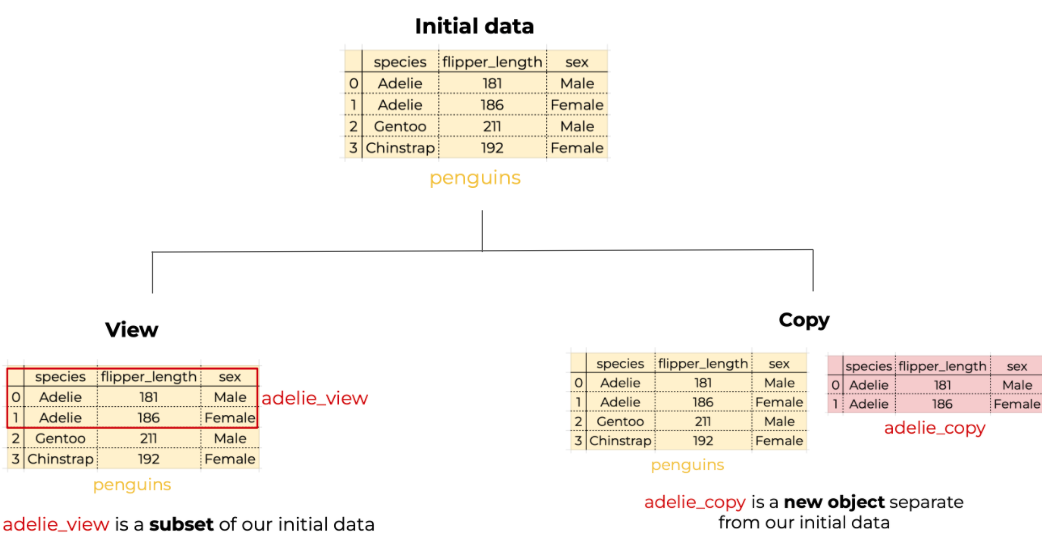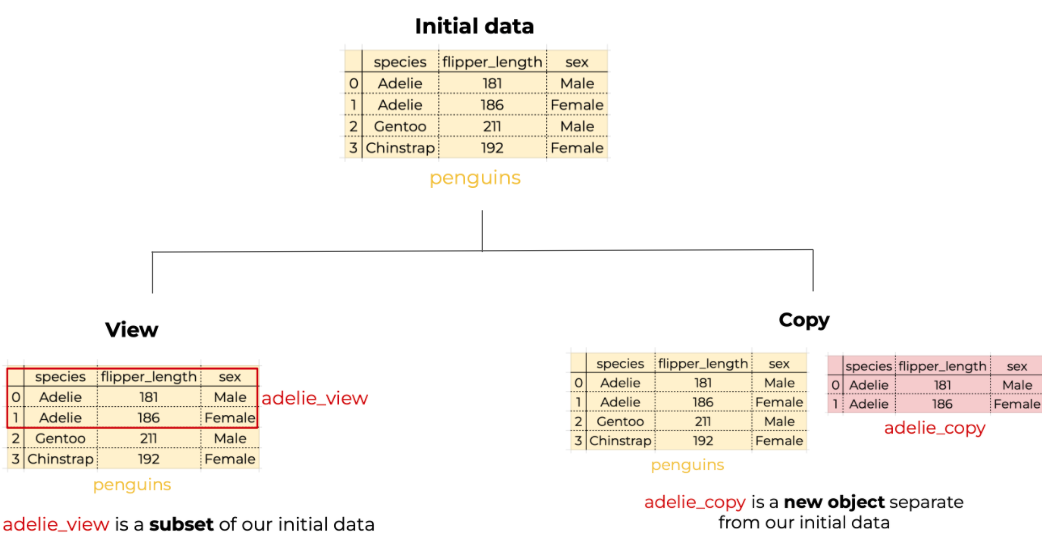
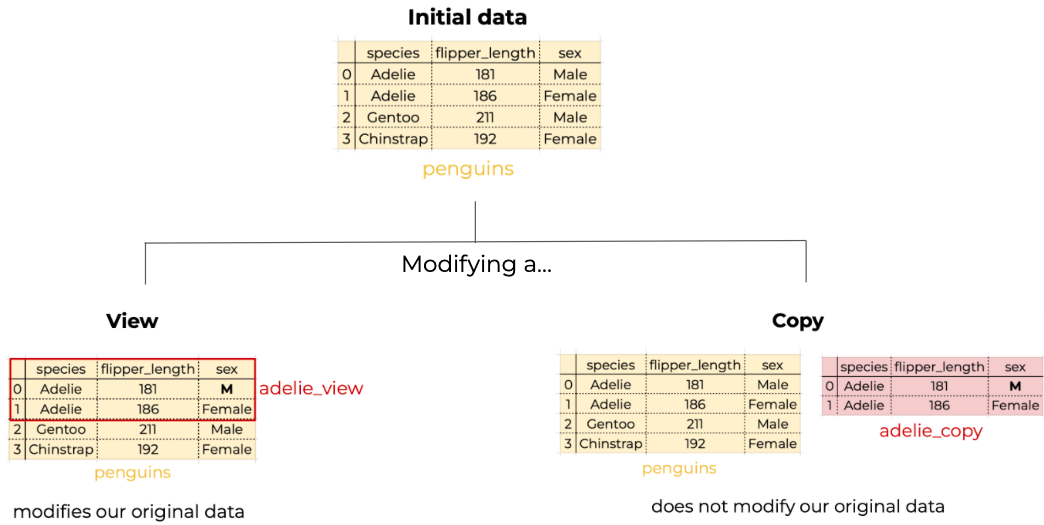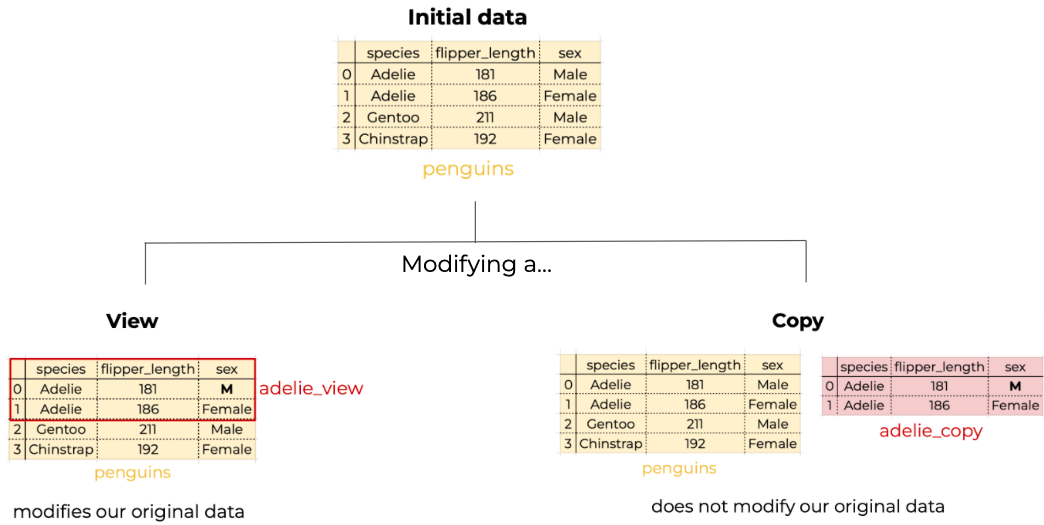
Depending on what we are trying to do we might want to modify the original data frame or we might want to modify a copy.

Pandas raises the SettingWithCopyWarning because it tries to balance memory efficiency with data integrity. By default, it avoids creating unnecessary copies, but sometimes it’s ambiguous whether a subset should be independent (a copy) or connected (a view).

## Example:

We only want to use data from Biscoe island and, after doing some analyses, we want to add a new column to it:

In [27]:
# Select penguins from Biscoe island
biscoe = penguins[penguins.island=='Biscoe']

# ... Other analyses ...

# Add a column
biscoe['sample_col'] = 100  # This raises SettingWithCopyWarning

/tmp/ipykernel_1052053/844154415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biscoe['sample_col'] = 100  # This raises SettingWithCopyWarning


#### We can also explicitely ask for a copy of a the dataset when subsetting using the `copy()` method

In [30]:
# Select penguins from Biscoe island
biscoe = penguins[penguins.island=='Biscoe'].copy()

# ... Other analyses ...

# Add a column
biscoe['sample_column'] = 100  # This raises SettingWithCopyWarning

In [31]:
biscoe.head()

,species,island,bill_length_mm,bill_depth_mm,sex,year,body_mass_kg,flipper_length_cm,observer,size,sample_column
id_code,,,,,,,,,,,
338,Adelie,Biscoe,37.8,18.3,F,2007,3.40,17.4,A,medium,100
617,Adelie,Biscoe,37.7,18.7,M,2007,3.60,18.0,C,medium,100
716,Adelie,Biscoe,35.9,19.2,F,2007,3.80,18.9,C,medium,100
127,Adelie,Biscoe,38.2,18.1,M,2007,3.95,18.5,B,medium,100
674,Adelie,Biscoe,38.8,17.2,M,2007,3.80,18.0,C,medium,100


In [32]:
'sample_column' in penguins.columns

False